https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/sas/sas6-categoricaldata/SAS6-CategoricalData2.html

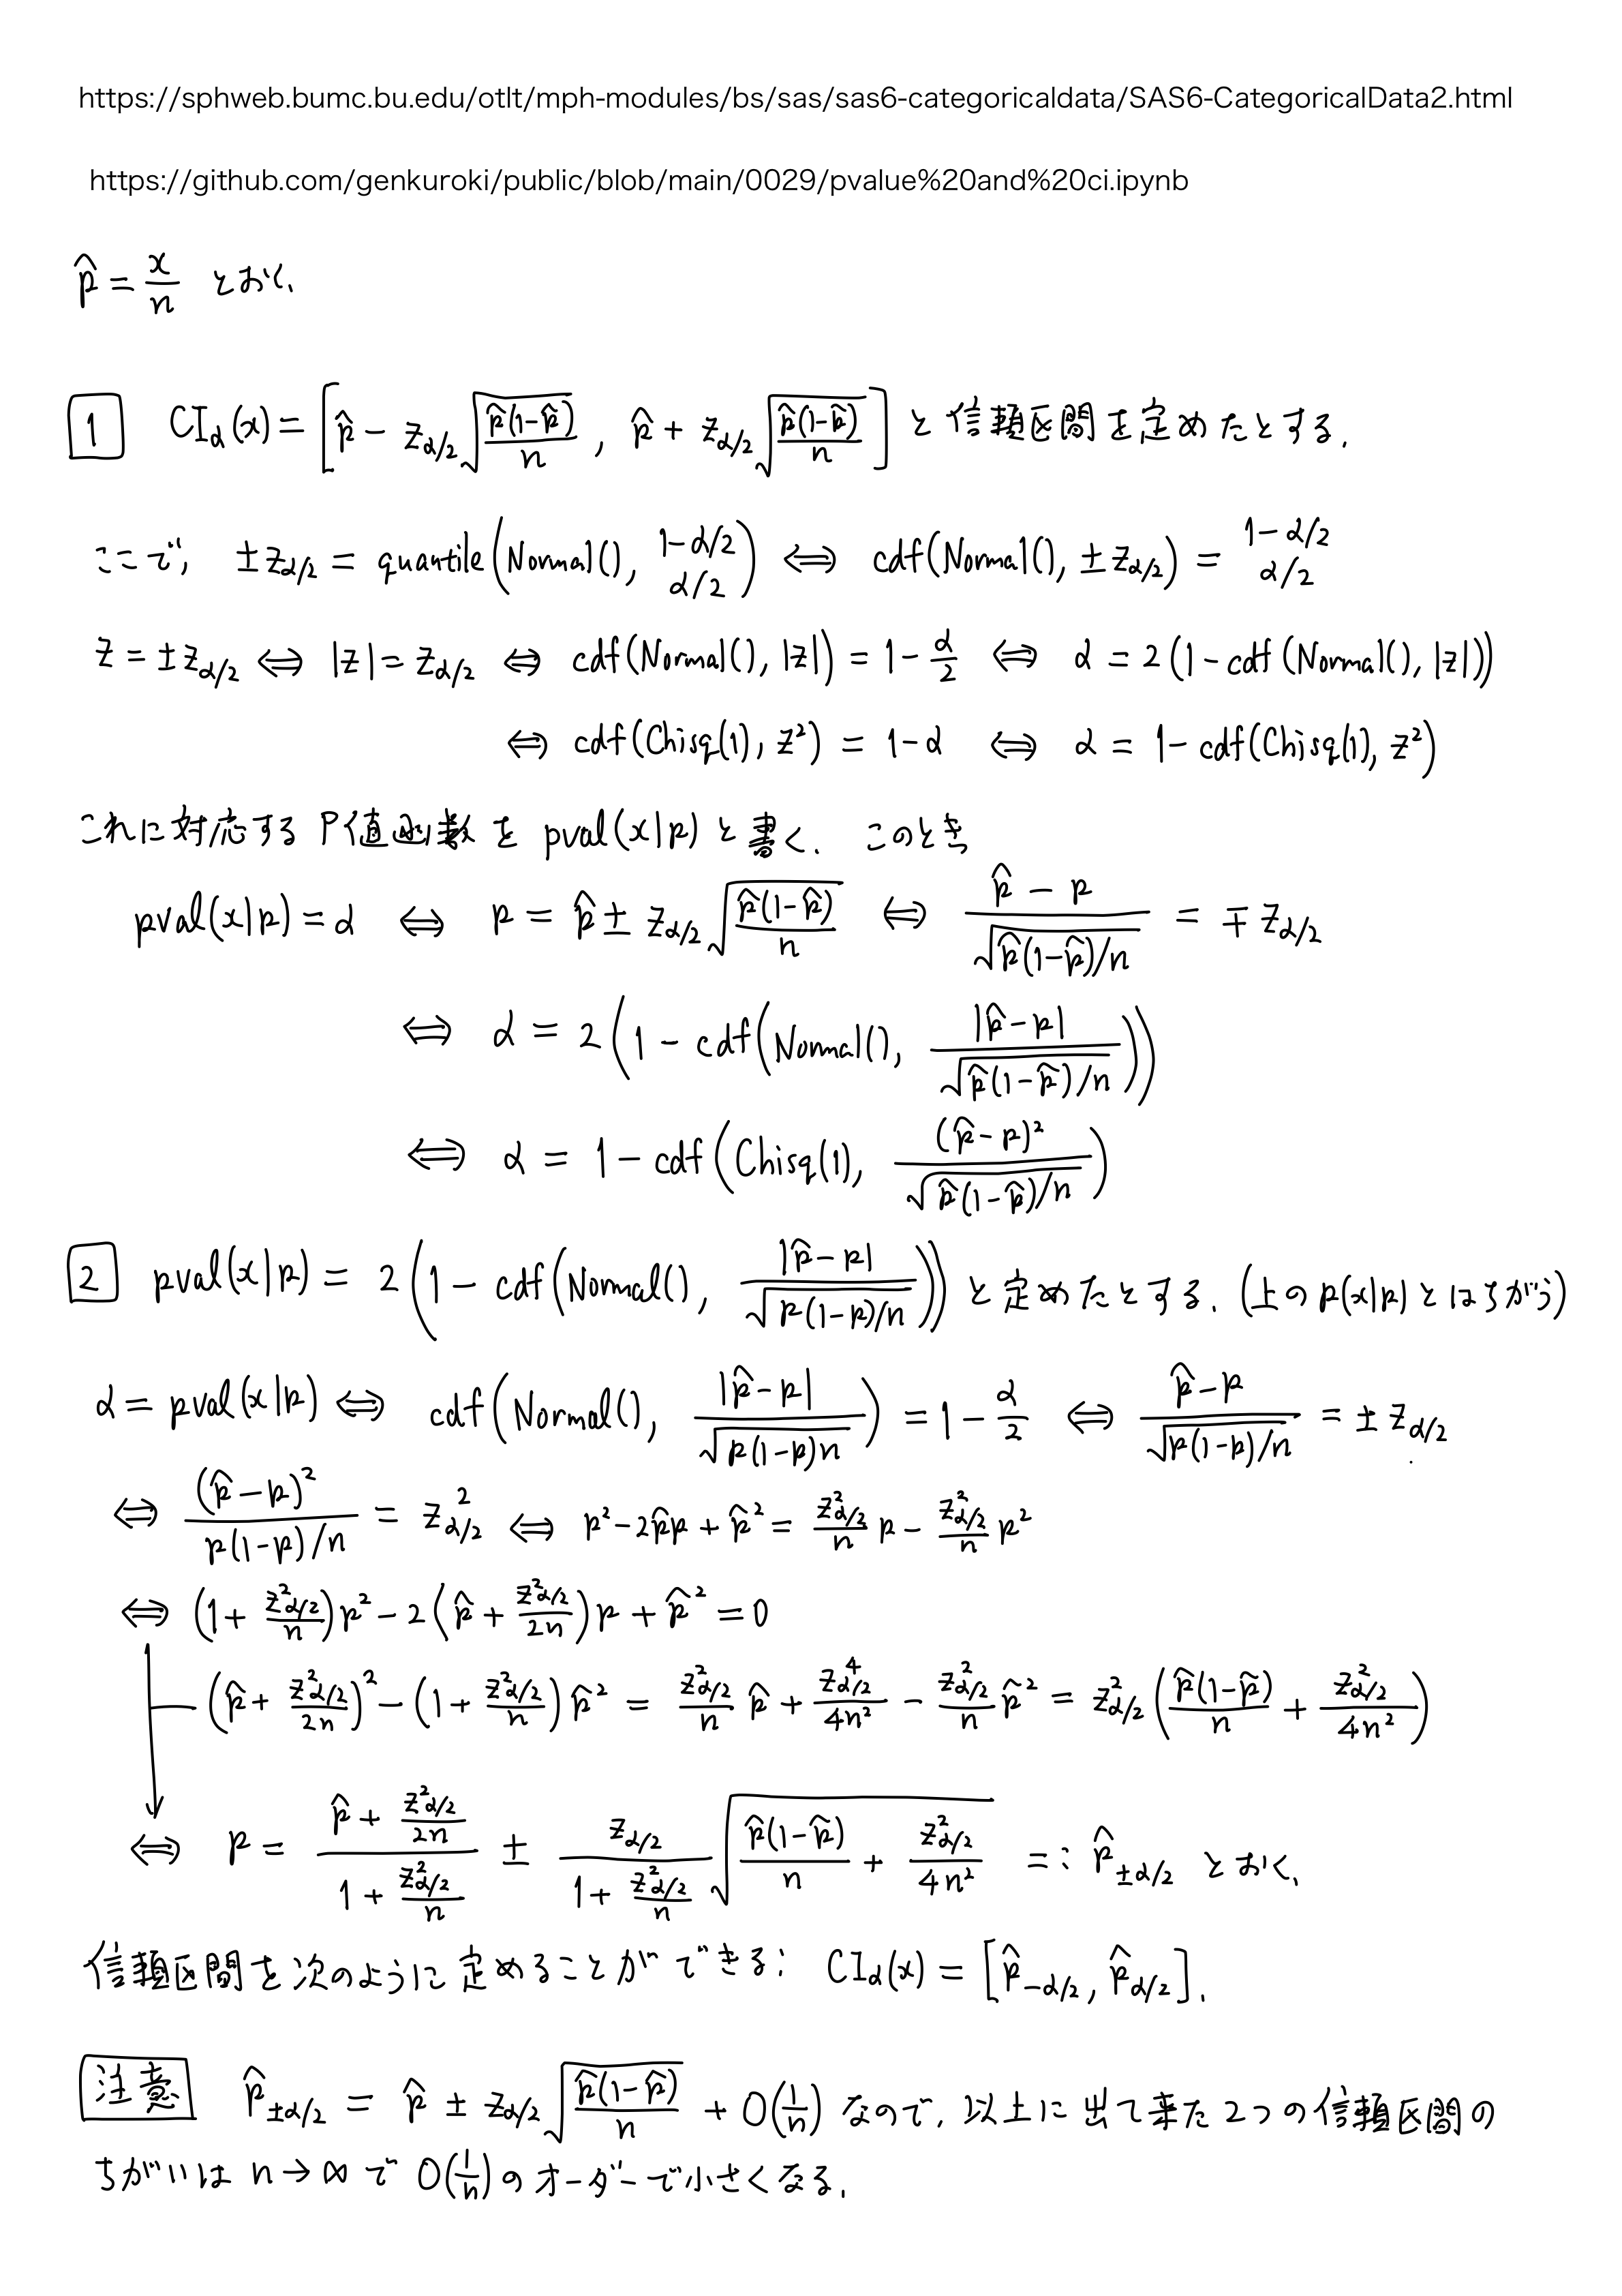

In [1]:
using Distributions
using StatsPlots
default(fmt = :png, titlefontsize = 12)
using Roots
using SymPy

In [2]:
@vars p z n x
A = 1 + z^2/n
B = p + z^2/(2n)
C = p^2
D′ = (B^2 - A*C).expand().factor()

 2 /       2            2\
z *\- 4*n*p  + 4*n*p + z /
--------------------------
              2           
           4*n            

In [3]:
D′ * 4n^2

 2 /       2            2\
z *\- 4*n*p  + 4*n*p + z /

In [4]:
sol = solve(A*x^2 - 2B*x + C, x)

2-element Vector{Sym}:
 (n*p + z^2/2 - z*sqrt(-4*n*p^2 + 4*n*p + z^2)/2)/(n + z^2)
 (n*p + z^2/2 + z*sqrt(-4*n*p^2 + 4*n*p + z^2)/2)/(n + z^2)

In [5]:
sol * (n + z^2) * 2

2-element Vector{Sym}:
 2*n*p + z^2 - z*sqrt(-4*n*p^2 + 4*n*p + z^2)
 2*n*p + z^2 + z*sqrt(-4*n*p^2 + 4*n*p + z^2)

In [6]:
function pval_wald(x, n, p)
    p̂ = x/n
    SE = √(p̂*(1 - p̂)/n)
    2ccdf(Normal(), abs(p̂ - p)/SE)
end

function ci_wald(x, n, α)
    p̂ = x/n
    SE = √(p̂*(1 - p̂)/n)
    z = quantile(Normal(), 1 - α/2)
    p̂ - z*SE, p̂ + z*SE
end

function pval_score(x, n, p)
    p̂ = x/n
    SE = √(p*(1 - p)/n)
    2ccdf(Normal(), abs(p̂ - p)/SE)
end

function ci_score(x, n, α)
    p̂ = x/n
    SE² = p̂*(1 - p̂)/n
    z = quantile(Normal(), 1 - α/2)
    p′ = (p̂ + z^2/(2n))/(1 + z^2/n)
    SE′ = √(SE² + z^2/(4n^2))/(1 + z^2/n)
    p′ - z*SE′, p′ + z*SE′
end

# P値函数から信頼区間を計算
function ci(pval, x, n, α)
    sol = find_zeros(p -> pval(x, n, p) - α, 0, 1)
    first(sol), last(sol)
end

r(x) = round(x; digits=10)

r (generic function with 1 method)

In [7]:
n = 10
x = 3
α = 0.05
@show ci_wald(x, n, α) .|> r
@show ci(pval_wald, x, n, α) .|> r
@show ci_score(x, n, α) .|> r
@show ci(pval_score, x, n, α) .|> r
;

ci_wald(x, n, α) .|> r = (0.0159742349, 0.5840257651)
ci(pval_wald, x, n, α) .|> r = (0.0159742349, 0.5840257651)
ci_score(x, n, α) .|> r = (0.1077912674, 0.6032218525)
ci(pval_score, x, n, α) .|> r = (0.1077912674, 0.6032218525)


P値函数から計算した信頼区間が直接計算した信頼区間にぴったり一致している.

P値函数のプロット

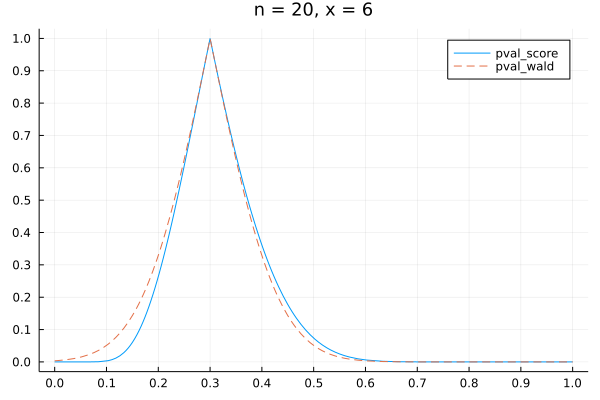

In [8]:
function plot_pvalfuncs(n, x)
    plot(; legend = 2x < n ? :topright : :topleft)
    plot!(p -> pval_score(x, n, p), 0, 1; label="pval_score")
    plot!(p -> pval_wald(x, n, p), 0, 1; label="pval_wald", ls=:dash)
    plot!(; xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(; xlim=(-0.03, 1.03), ylim=(-0.03, 1.03))
    title!("n = $n, x = $x")
end

plot_pvalfuncs(20, 6)

P値函数のアニメーション

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0029\pvalfuncs20.gif
└ @ Plots D:\.julia\packages\Plots\rDbWY\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0029\\pvalfuncs20.gif")
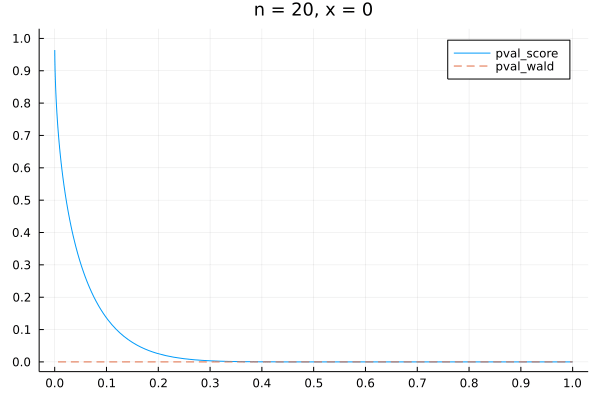

In [9]:
n = 20
anim = @animate for x in 0:20
    plot_pvalfuncs(n, x)
end
gif(anim, "pvalfuncs20.gif"; fps=4)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0029\pvalfuncs100.gif
└ @ Plots D:\.julia\packages\Plots\rDbWY\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0029\\pvalfuncs100.gif")
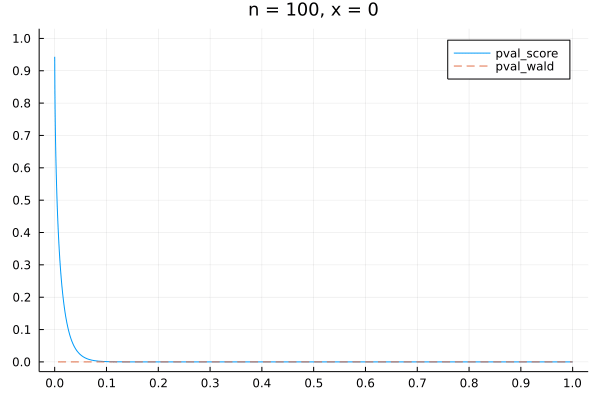

In [10]:
n = 100
anim = @animate for x in 0:100
    plot_pvalfuncs(n, x)
end
gif(anim, "pvalfuncs100.gif")